In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%cd /content/drive/MyDrive/mini_project

/content/drive/MyDrive/mini_project


In [ ]:

import opendatasets as od
import pandas
  
od.download(
    "https://www.kaggle.com/datasets/abhinowww/hand-cricket-symbols")

ModuleNotFoundError: ignored

In [ ]:
%ls

hand-cricket-symbols/  input/  input.zip  model_VGG-10.h5


In [ ]:
!unzip hand-cricket-symbols.zip

unzip:  cannot find or open hand-cricket-symbols.zip, hand-cricket-symbols.zip.zip or hand-cricket-symbols.zip.ZIP.


In [ ]:
import pandas as pd
import numpy as np 
import os
import itertools
import keras
import tensorflow as tf

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array,load_img
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense  
from keras import applications 
#from keras.application.vgg16 import preprocess_input 
from keras.utils.np_utils import to_categorical  

import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools

import imutils
import math  
import datetime
import time
from tqdm import tqdm
import cv2
print("Library Set Up Success")

Library Set Up Success


In [ ]:
sample_img.shape

(250, 200, 3)

In [ ]:
img_width, img_height = 224, 224

#setting up the directories
train_data_dir = '/content/drive/MyDrive/mini_project/hand-cricket-symbols/dataset/train'
validation_data_dir = '/content/drive/MyDrive/mini_project/hand-cricket-symbols/dataset/test'
input_shape = (img_width, img_height, 3)
batch_size = 32  

In [ ]:
# this is the augmentation configuration we will use for training
# augumentation generates more training images by rescaling, shearing, etc
train_datagen = ImageDataGenerator(
    rescale=1./ 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
   )

In [ ]:
#this generates batches of augment data for training
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    
    class_mode='categorical')

Found 20000 images belonging to 8 classes.


In [ ]:
# this is the augmentation configuration we will use for validating
val_datagen = ImageDataGenerator(rescale=1./255)

#this generates batches of augment data for validating
validation_generator = train_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle=False,
   
    class_mode='categorical')

Found 8800 images belonging to 8 classes.


In [ ]:
from keras.layers import Activation, Dropout, Convolution2D, GlobalAveragePooling2D,Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
base=tf.keras.applications.mobilenet.MobileNet(input_shape=(224, 224, 3), include_top=False,weights="imagenet")

In [ ]:
base.trainable=False

In [ ]:
base.input_shape

(None, 224, 224, 3)

In [ ]:
model = Sequential([
        base,
        GlobalAveragePooling2D(),  # Pooling Layer
       Dense(1024,activation='relu'), #we add dense layers so that the model can learn more complex functions and classify for better results.
# Dense(1024,activation='relu'), #dense layer 2
Dense(512,activation='relu'),
Dense(8,activation='softmax'),
             # Softmax - Activation Function - For Multi Class Classification
    ])
  

In [ ]:

model.compile(
    optimizer="adam",         # lr = learning_rate
    loss='categorical_crossentropy',   # Multi-class classification
    metrics=['accuracy']  
)



In [ ]:
%pwd

'/content/drive/MyDrive/mini_project'

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d_8   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dense_5 (Dense)             (None, 8)                 4104      
                                                                 
Total params: 4,807,368
Trainable params: 1,578,504
No

In [ ]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
 
callbacks= [ModelCheckpoint('handModel.h5', save_weights_only=False, save_best_only=True, verbose=1)]


In [ ]:
history=model.fit(train_generator, epochs=2, validation_data=validation_generator, batch_size=32, callbacks=[callbacks])

Epoch 1/2
625/625 [==============================] - ETA: 0s - loss: 0.0876 - accuracy: 0.9727
Epoch 1: val_loss improved from inf to 0.01960, saving model to handModel.h5
625/625 [==============================] - 384s 611ms/step - loss: 0.0876 - accuracy: 0.9727 - val_loss: 0.0196 - val_accuracy: 0.9941
Epoch 2/2
625/625 [==============================] - ETA: 0s - loss: 0.0223 - accuracy: 0.9924
Epoch 2: val_loss did not improve from 0.01960
625/625 [==============================] - 379s 607ms/step - loss: 0.0223 - accuracy: 0.9924 - val_loss: 0.0635 - val_accuracy: 0.9798


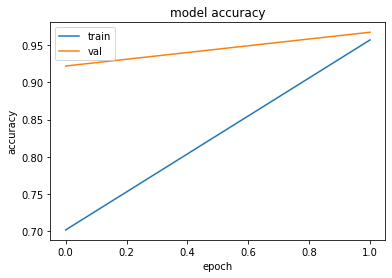

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

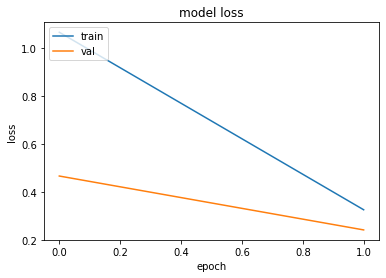

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save_weights('/content/my_model_weights_cc.h5')

In [ ]:
model.save('/content/my_model_cc.h5')

In [ ]:
model.input_shape

(None, 224, 224, 3)

In [ ]:
predictions = model.evaluate(validation_generator)

275/275 [==============================] - 128s 464ms/step - loss: 0.0024 - accuracy: 0.9993


In [ ]:
predictions = model.predict(validation_generator)
predicted_classes = [np.argmax(x) for x in predictions]

275/275 [==============================] - 127s 460ms/step


In [ ]:
predicted_classes

In [ ]:
predicted_classes

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(validation_generator.classes,predicted_classes))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1100
           1       1.00      1.00      1.00      1100
           2       1.00      1.00      1.00      1100
           3       1.00      1.00      1.00      1100
           4       1.00      1.00      1.00      1100
           5       1.00      1.00      1.00      1100
           6       1.00      1.00      1.00      1100
           7       1.00      1.00      1.00      1100

    accuracy                           1.00      8800
   macro avg       1.00      1.00      1.00      8800
weighted avg       1.00      1.00      1.00      8800



In [ ]:
cm=confusion_matrix(validation_generator.classes,predicted_classes)
plot_confusion_matrix(cm,)

NameError: ignored

In [ ]:
path_img="/content/image.png"

In [ ]:
sample_img=cv2.imread(path_img)

NameError: ignored

In [ ]:
img = load_img(path_img, grayscale=False, target_size=(224, 224))
x = img_to_array(img)

print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)
x = np.array(x, 'float32')

print(x.shape)
x /= 255

preds=model.predict(x)
print("prediction",preds)
        # print(result)
print("Res",preds[0])
print(np.argmax(preds[0]))
plt.imshow(sample_img)


FileNotFoundError: ignored